### **Steps in Data Analysis using Python:**

1. Import necessary libraries like NumPy, pandas, matplotlib, seaborn, etc.
2. Load the dataset.
3. Data Understanding (Check NULL Values, remove duplicates if any, check data type, rename columns, etc.)
4. Data Reduction (Remove columns that are not a part of analysis)
5. Feature Engineering (Create new columns or manipulating existing columns itself  by manipulating the exixting data)
6. Data Wrangling/ Data Cleaning
7. Exploratory Data Analytics (EDA):
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis

In [2]:
# Step 1 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 2
df = pd.read_csv("used_cars_data (2).csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [6]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [7]:
# Step 4 - Data Reduction

#col drop
df.drop(columns=["S.No.", "New_Price"], inplace=True)

#Row drop (mileage, engine, power, seats and price)
df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats', 'Price'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [9]:
# Feature Engineering
#create a new col named brand
df["Brand"] = df.Name.str.split().str.get(0)
df["Brand"]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 5975, dtype: object

In [10]:
df["Engine"] = df.Engine.str.split().str.get(0)
df["Power"] = df.Power.str.split().str.get(0)

In [11]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74,Audi


In [12]:
df["Engine"] = pd.to_numeric(df["Engine"], errors = "coerce")
df["Power"] = pd.to_numeric(df["Power"], errors = "coerce")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 653.5+ KB


In [14]:
# Create a new col "Car_Age"

from datetime import datetime
current_year = datetime.now().year

In [15]:
df["Car_Age"] = current_year - df["Year"]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5.0,12.50,Hyundai,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5.0,4.50,Honda,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5.0,17.74,Audi,12


In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5.0,12.50,Hyundai,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5.0,4.50,Honda,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5.0,17.74,Audi,12


In [17]:
df.drop(columns=["Name", "Year"], inplace = True)

In [18]:
df["Seats"] = df["Seats"].astype(int)
df["Seats"] = df["Seats"].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   object 
 5   Mileage            5975 non-null   object 
 6   Engine             5975 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5975 non-null   object 
 9   Price              5975 non-null   float64
 10  Brand              5975 non-null   object 
 11  Car_Age            5975 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 606.8+ KB


In [20]:
df= df[df["Seats"] != "0"]
df["Seats"].unique()

array(['5', '7', '8', '4', '6', '2', '10', '9'], dtype=object)

In [21]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,Diesel,Manual,First,28.4 kmpl,1248,74.00,5,4.75,Maruti,11
6015,Jaipur,100000,Diesel,Manual,First,24.4 kmpl,1120,71.00,5,4.00,Hyundai,10
6016,Jaipur,55000,Diesel,Manual,Second,14.0 kmpl,2498,112.00,8,2.90,Mahindra,13
6017,Kolkata,46000,Petrol,Manual,First,18.9 kmpl,998,67.10,5,2.65,Maruti,12


In [22]:
df.reset_index(drop= True, inplace= True)

In [23]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Delhi,27365,Diesel,Manual,First,28.4 kmpl,1248,74.00,5,4.75,Maruti,11
5970,Jaipur,100000,Diesel,Manual,First,24.4 kmpl,1120,71.00,5,4.00,Hyundai,10
5971,Jaipur,55000,Diesel,Manual,Second,14.0 kmpl,2498,112.00,8,2.90,Mahindra,13
5972,Kolkata,46000,Petrol,Manual,First,18.9 kmpl,998,67.10,5,2.65,Maruti,12


In [24]:
# mileage column 

def kmpl_kmkg_converter(mileage):
    if "km/kg" in mileage:
        value = float(mileage.replace(" km/kg", ""))
        return value * 0.75
    elif "kmpl" in mileage:
        value = float(mileage.replace(" kmpl", ""))
        return value
    else:
        return np.nan

In [25]:
df[  "Mileage"] = df["Mileage"].apply(lambda x: kmpl_kmkg_converter(str(x)))
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Delhi,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5970,Jaipur,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5971,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5972,Kolkata,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


In [26]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Delhi,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5970,Jaipur,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5971,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5972,Kolkata,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


df.info()

## **Data Wrangling:**

In [29]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [30]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [31]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [33]:
df.Seats.unique()

array(['5', '7', '8', '4', '6', '2', '10', '9'], dtype=object)

In [34]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [35]:
df["Brand"].replace({"Land": "Land Rover", "Mini": "Mini Cooper", "ISIZU" : "Isuzu"}, inplace = True)

In [36]:
df = df[df["Mileage"] != 0]

## **EDA:**

In [38]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5918.0,58518.14,91866.41,171.00,33855.75,53000.00,72671.00,6500000.0
Mileage,5918.0,18.28,4.11,6.40,15.29,18.20,21.10,28.4
Engine,5918.0,1620.00,598.15,624.00,1198.00,1493.00,1982.50,5998.0
Power,5844.0,113.14,53.81,34.20,75.00,94.68,138.10,560.0
Price,5918.0,9.48,11.16,0.44,3.50,5.65,9.91,160.0
Car_Age,5918.0,11.58,3.21,6.00,9.00,11.00,13.00,27.0


In [39]:
df.dropna(inplace = True)
df.reset_index(drop= True, inplace = True)

## **Analysis**

- The average kilometers driven is 58k kms, high standard deviation indicates the presence of outliers in the column.
- The mean and median of Mileage is almost same, indicating low outliers in mileage. An average mileage of 18 kmpl indicates that used cars available in the market are generally fuel-efficient with some car's mileage going up to a maximum of 28 kmpl.
- Looking at the presence of outliers in power, engine and price, we can divide the dataset into budget cars and luxury cars before we continue to do further analysis.
- The basis of dividing the df will be price. Price < 1000000 => Budget and Price 10000000 => Luxury.


In [41]:
# Create budget df and luxury df based on the criteria

budget_df = df[df["Price"] <= 10]
luxury_df = df[df["Price"] >= 10]

## **Budget Car Analysis**

In [43]:
budget_df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,58923.026160,19.261132,1398.841219,91.284270,4.819236,11.897634
std,38997.071893,3.868859,399.691191,29.291893,2.193494,3.260197
min,171.000000,9.000000,624.000000,34.200000,0.440000,6.000000
25%,35000.000000,16.800000,1197.000000,73.900000,3.100000,9.000000
50%,55000.000000,19.000000,1248.000000,85.800000,4.500000,11.000000
75%,74000.000000,22.070000,1498.000000,103.520000,6.300000,14.000000
max,775000.000000,28.400000,3498.000000,364.900000,10.000000,27.000000


In [44]:
budget_df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
0,Mumbai,72000,CNG,Manual,First,19.950,998,58.16,5,1.75,Maruti,15
2,Chennai,46000,Petrol,Manual,First,18.200,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.770,1248,88.76,7,6.00,Maruti,13
5,Hyderabad,75000,LPG,Manual,First,15.825,814,55.20,5,2.35,Hyundai,13
6,Jaipur,86999,Diesel,Manual,First,23.080,1461,63.10,5,3.50,Nissan,12


In [45]:
cat_col = budget_df.select_dtypes(include = ["object"]).columns.tolist()
cat_col

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']

In [46]:
numeric_col = budget_df.select_dtypes(include= ["number"]).columns.tolist()
numeric_col

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age']

Location


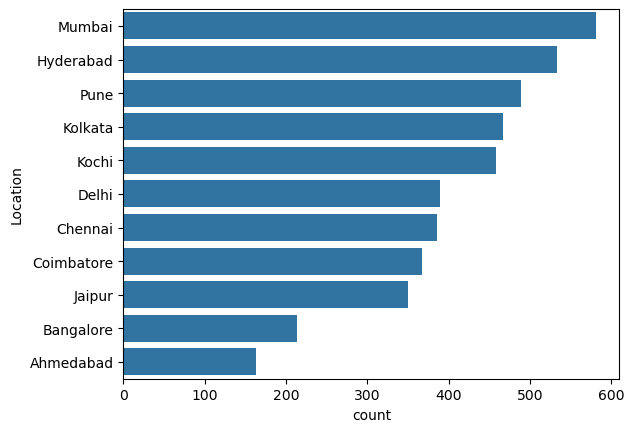

Fuel_Type


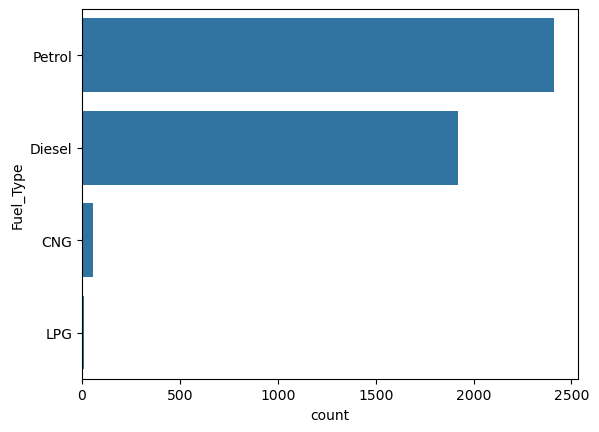

Transmission


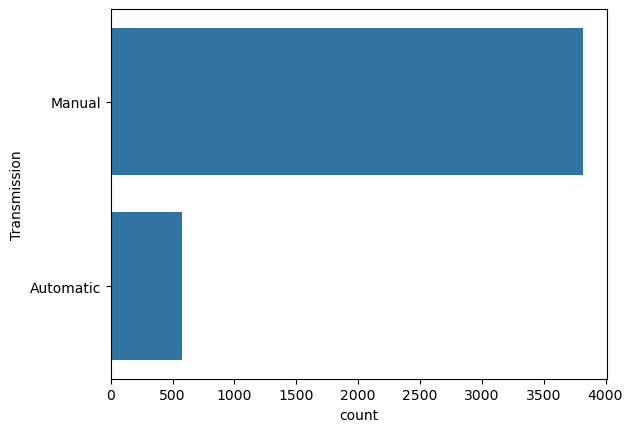

Owner_Type


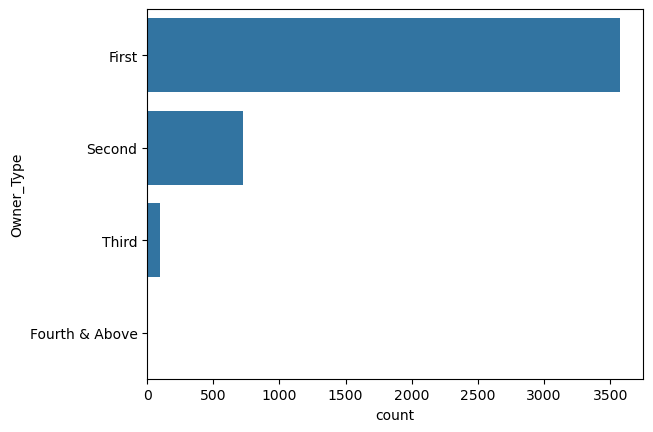

Seats


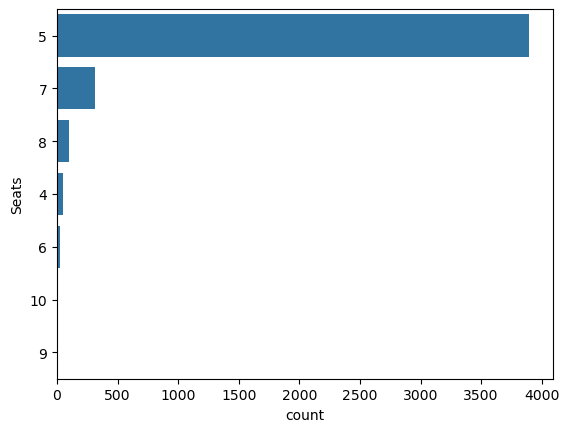

Brand


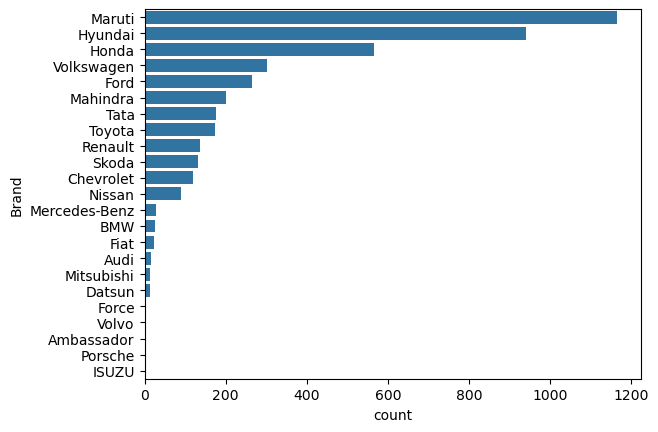

In [47]:
for col in cat_col:
    print(col)
    sns.countplot(budget_df[col], order=budget_df[col].value_counts().index)
    plt.show()

## **Univariate Analysis for Budget Cars:**

- Mumbai has the largest used car market followed by Hyderabad and Pune, respectively . Ahemdabad has the smallest car market for used cars.
- Based on fuel type, petrol and diseal cars rule the used car market with CNG and LPG cars have minimal numbers.
- In the used car market, majority cars are manual transmission.
- Most of the cars available in used car market are first-owned.
- Majority budget cars in used car market are 5-seaters followed by 7-seaters.
- Maruti rules the used car market followed by Hyndai and Honda..

Kilometers_Driven


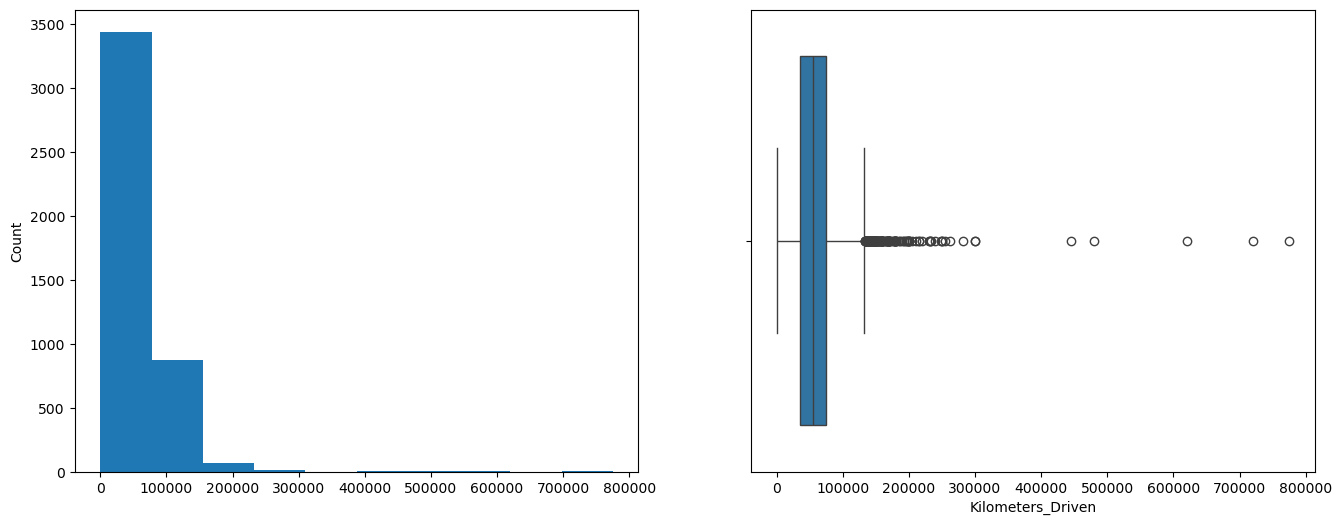

Mileage


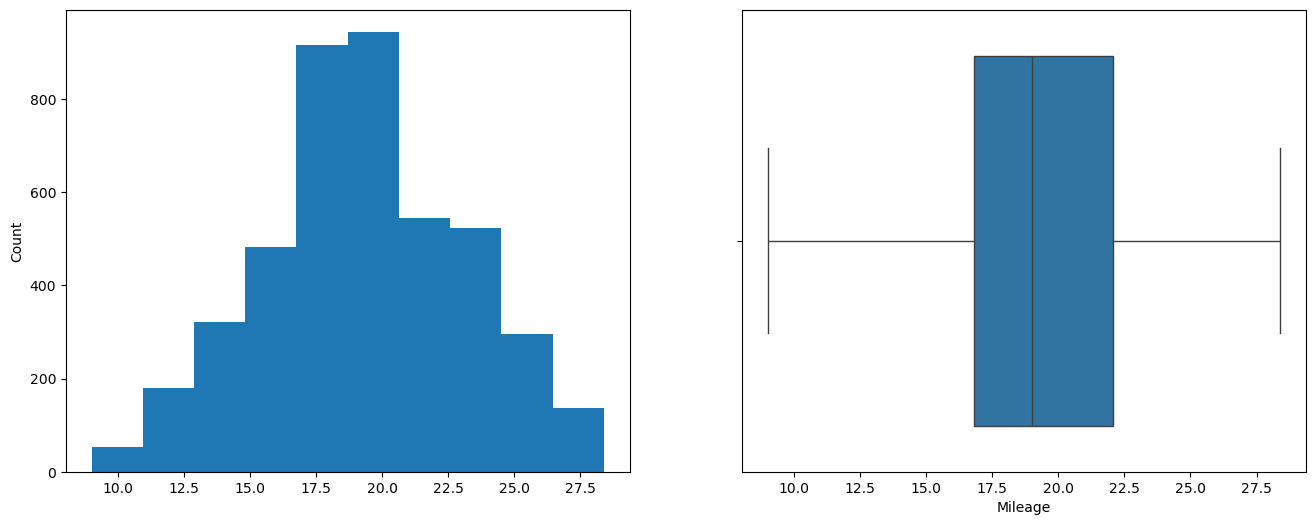

Engine


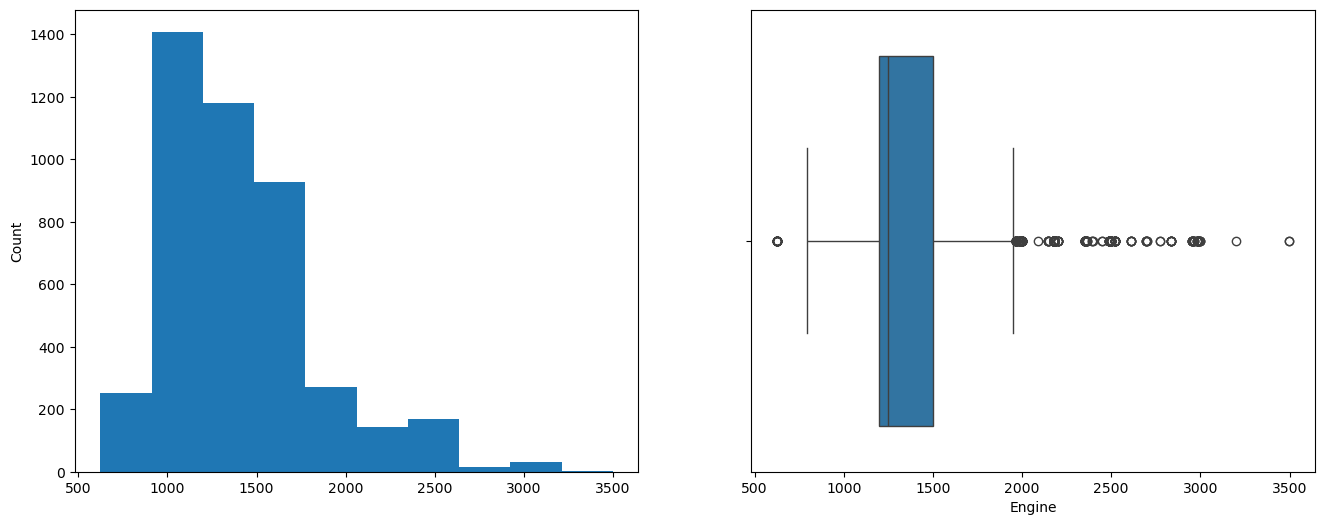

Power


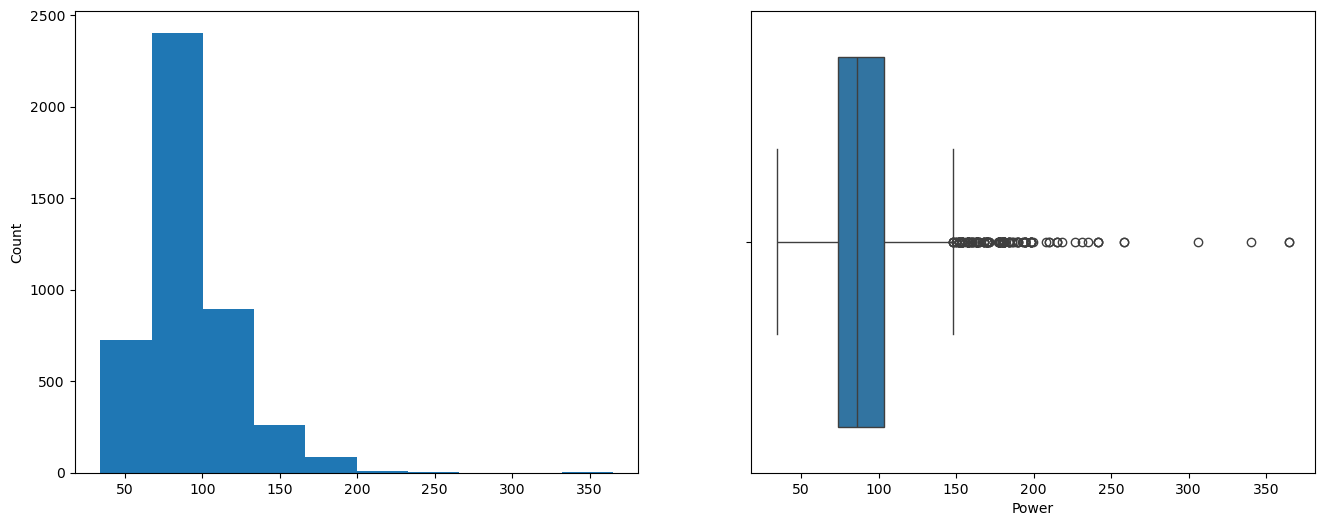

Price


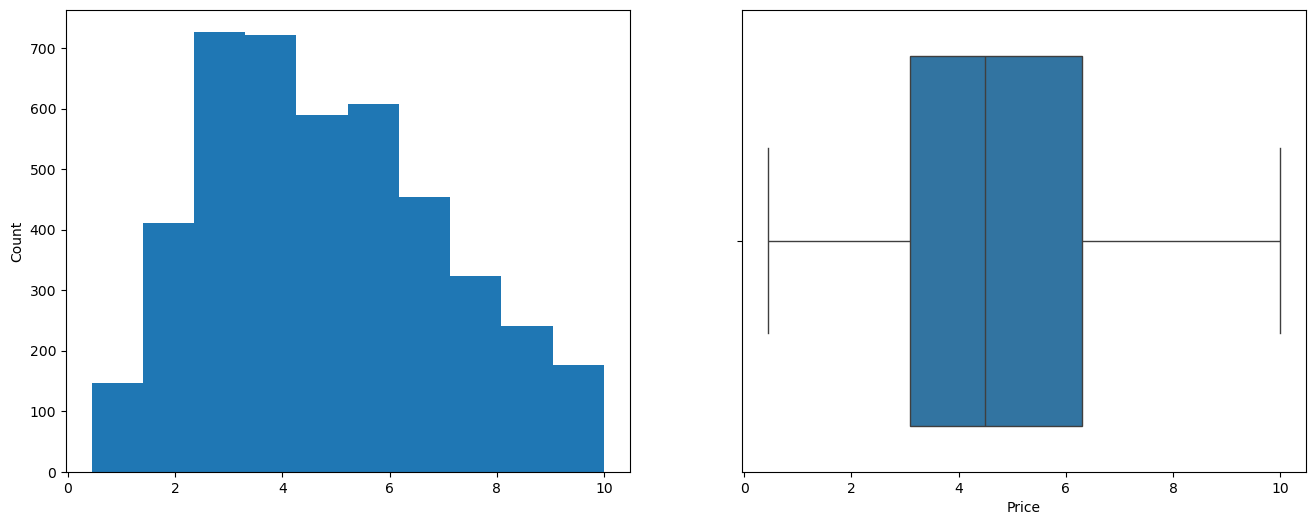

Car_Age


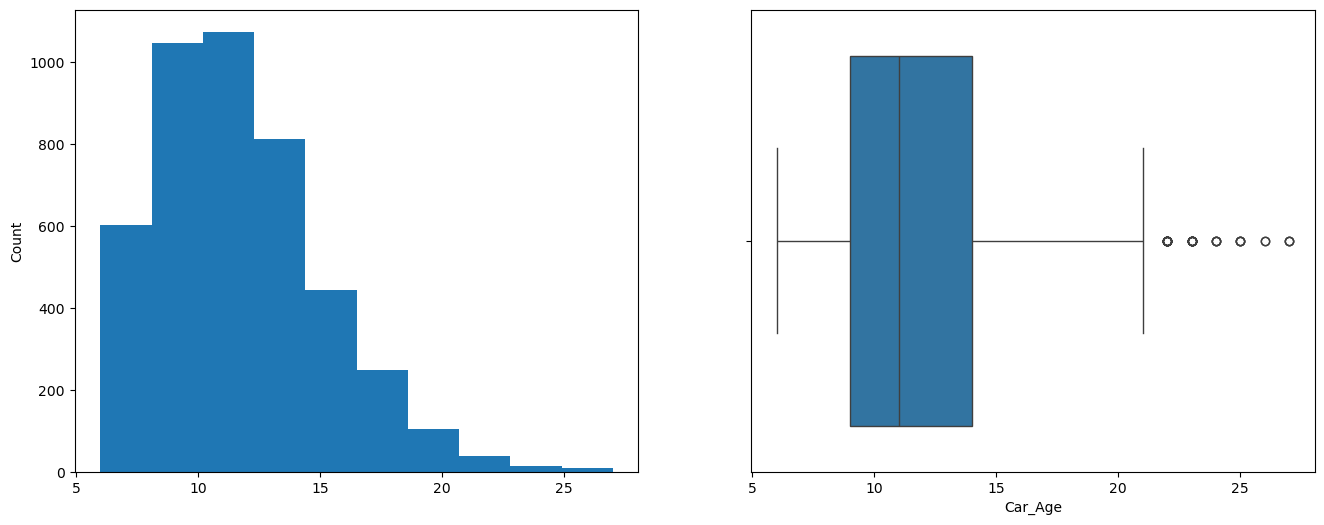

In [49]:
for col in numeric_col:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    budget_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=budget_df[col])
    plt.show()

## **Outliers Removal:**

In [51]:
for col in numeric_col:
    Q1= budget_df[col].quantile(0.25)
    Q3 = budget_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    budget_df = budget_df[(budget_df[col] >= lower_bound) & (budget_df[col] <= upper_bound)]

Kilometers_Driven


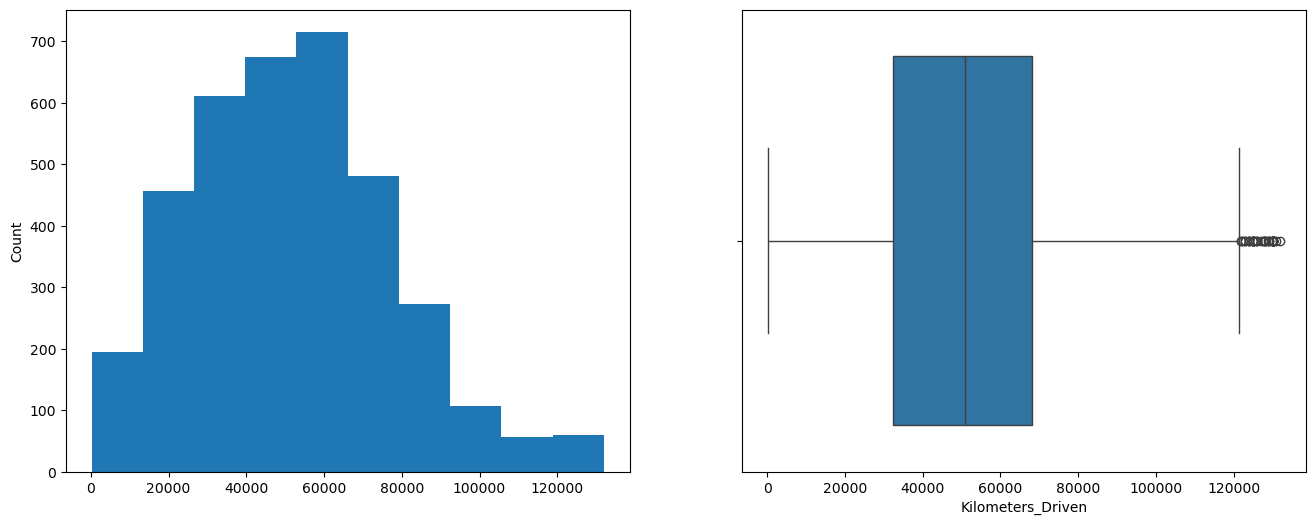

Mileage


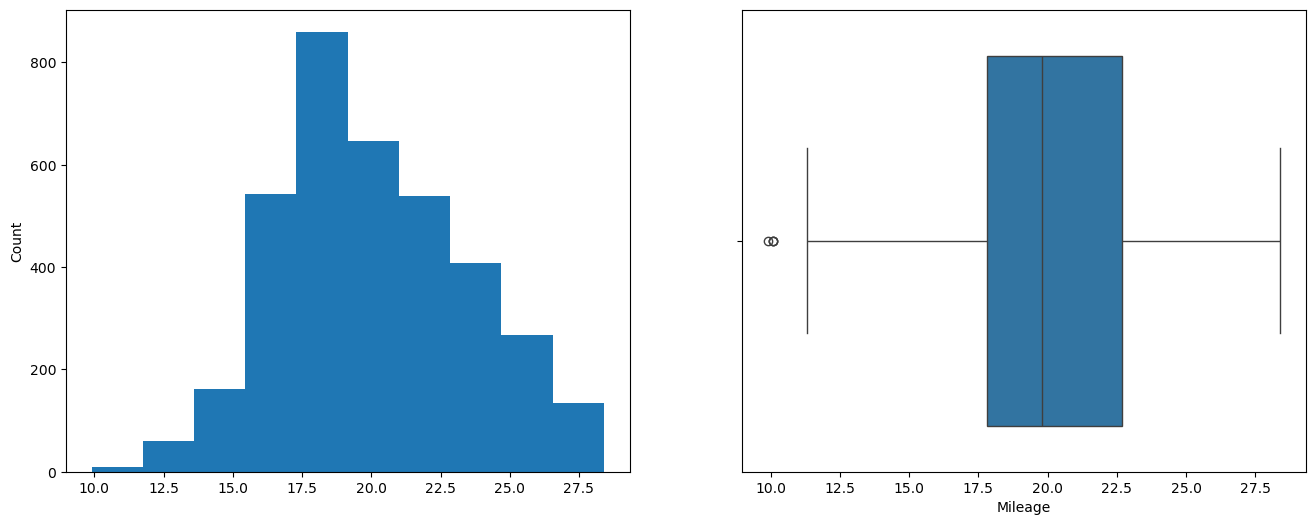

Engine


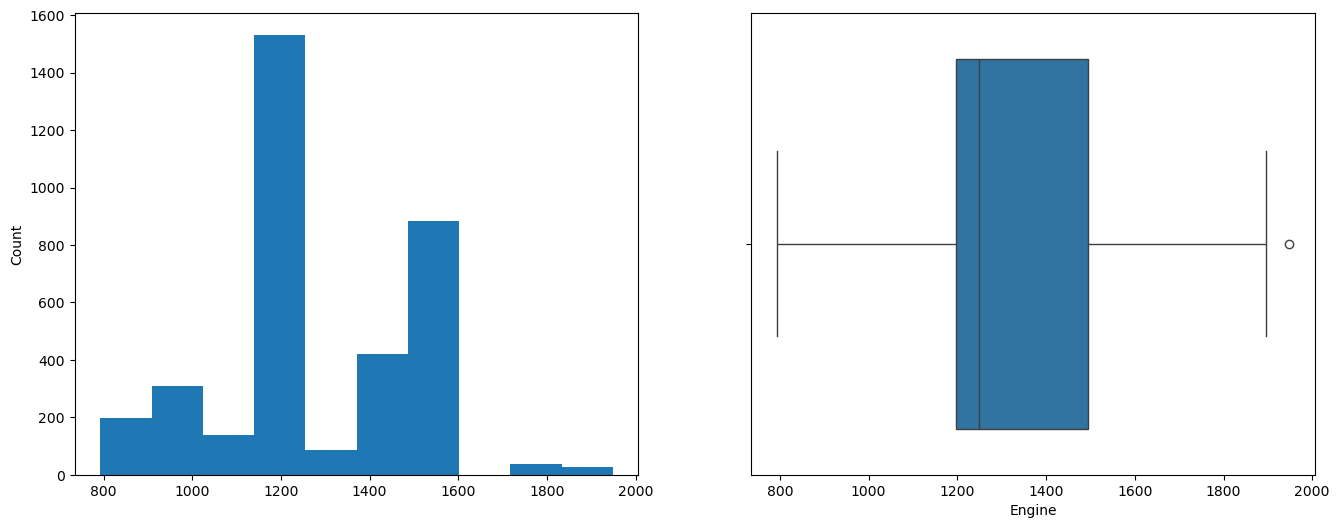

Power


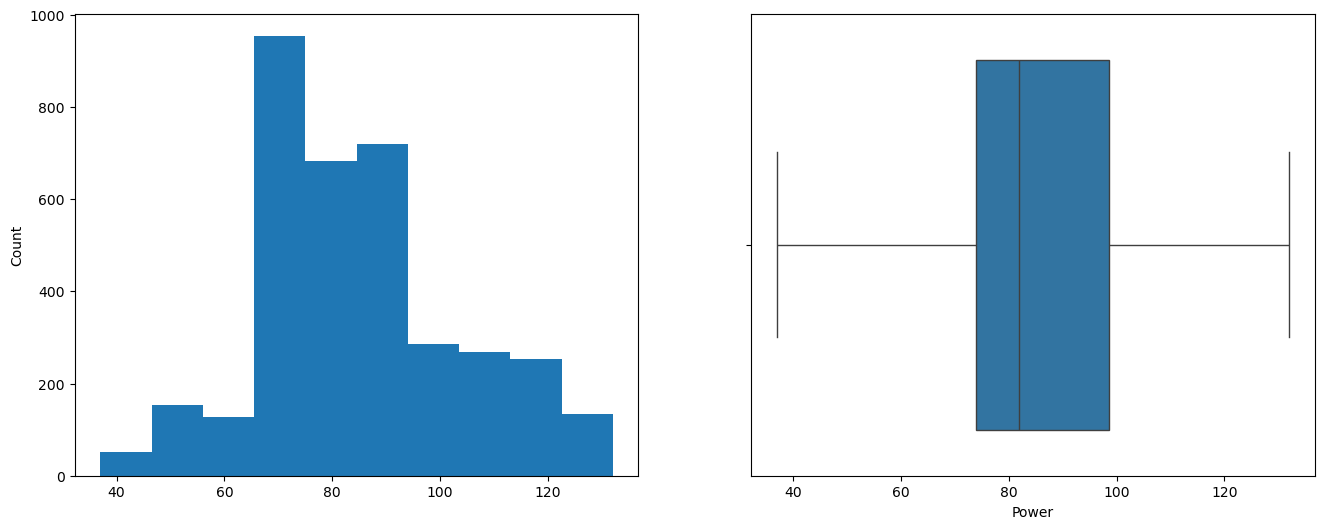

Price


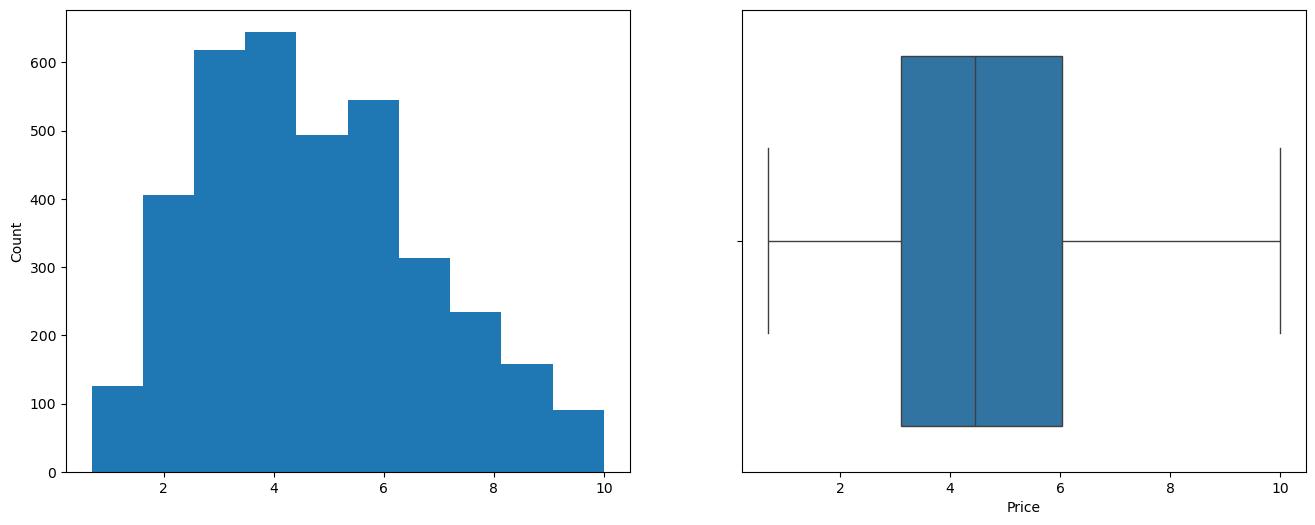

Car_Age


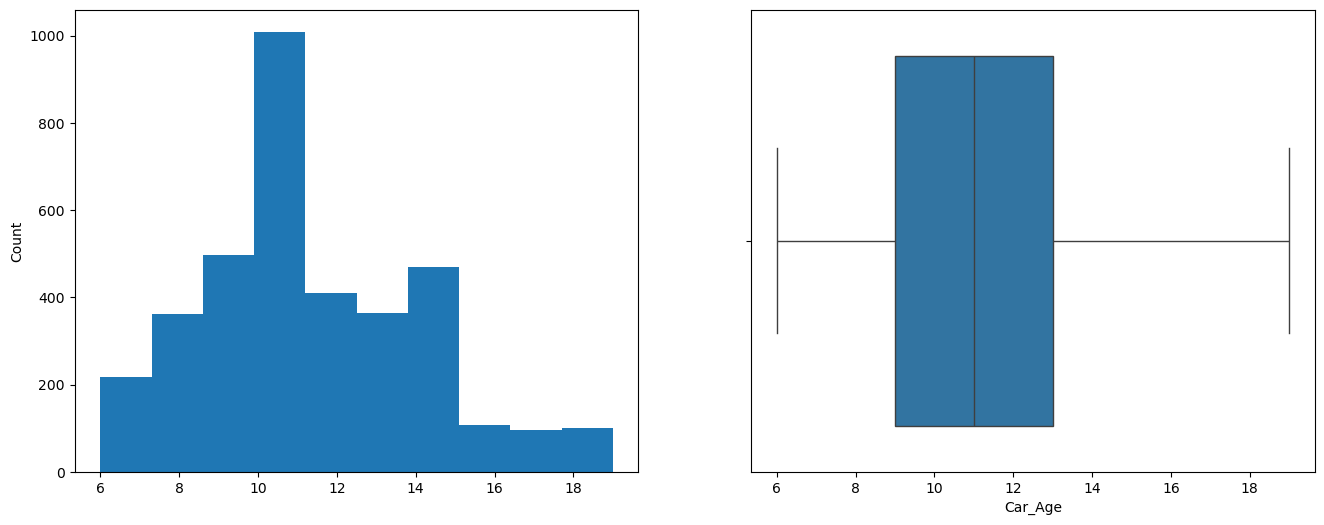

In [52]:
for col in numeric_col:
    print(col)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    budget_df[col].hist(grid=False)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(x=budget_df[col])
    plt.show()

## **Bivariate Analysis for Budget Cars:**

<Figure size 1200x800 with 0 Axes>

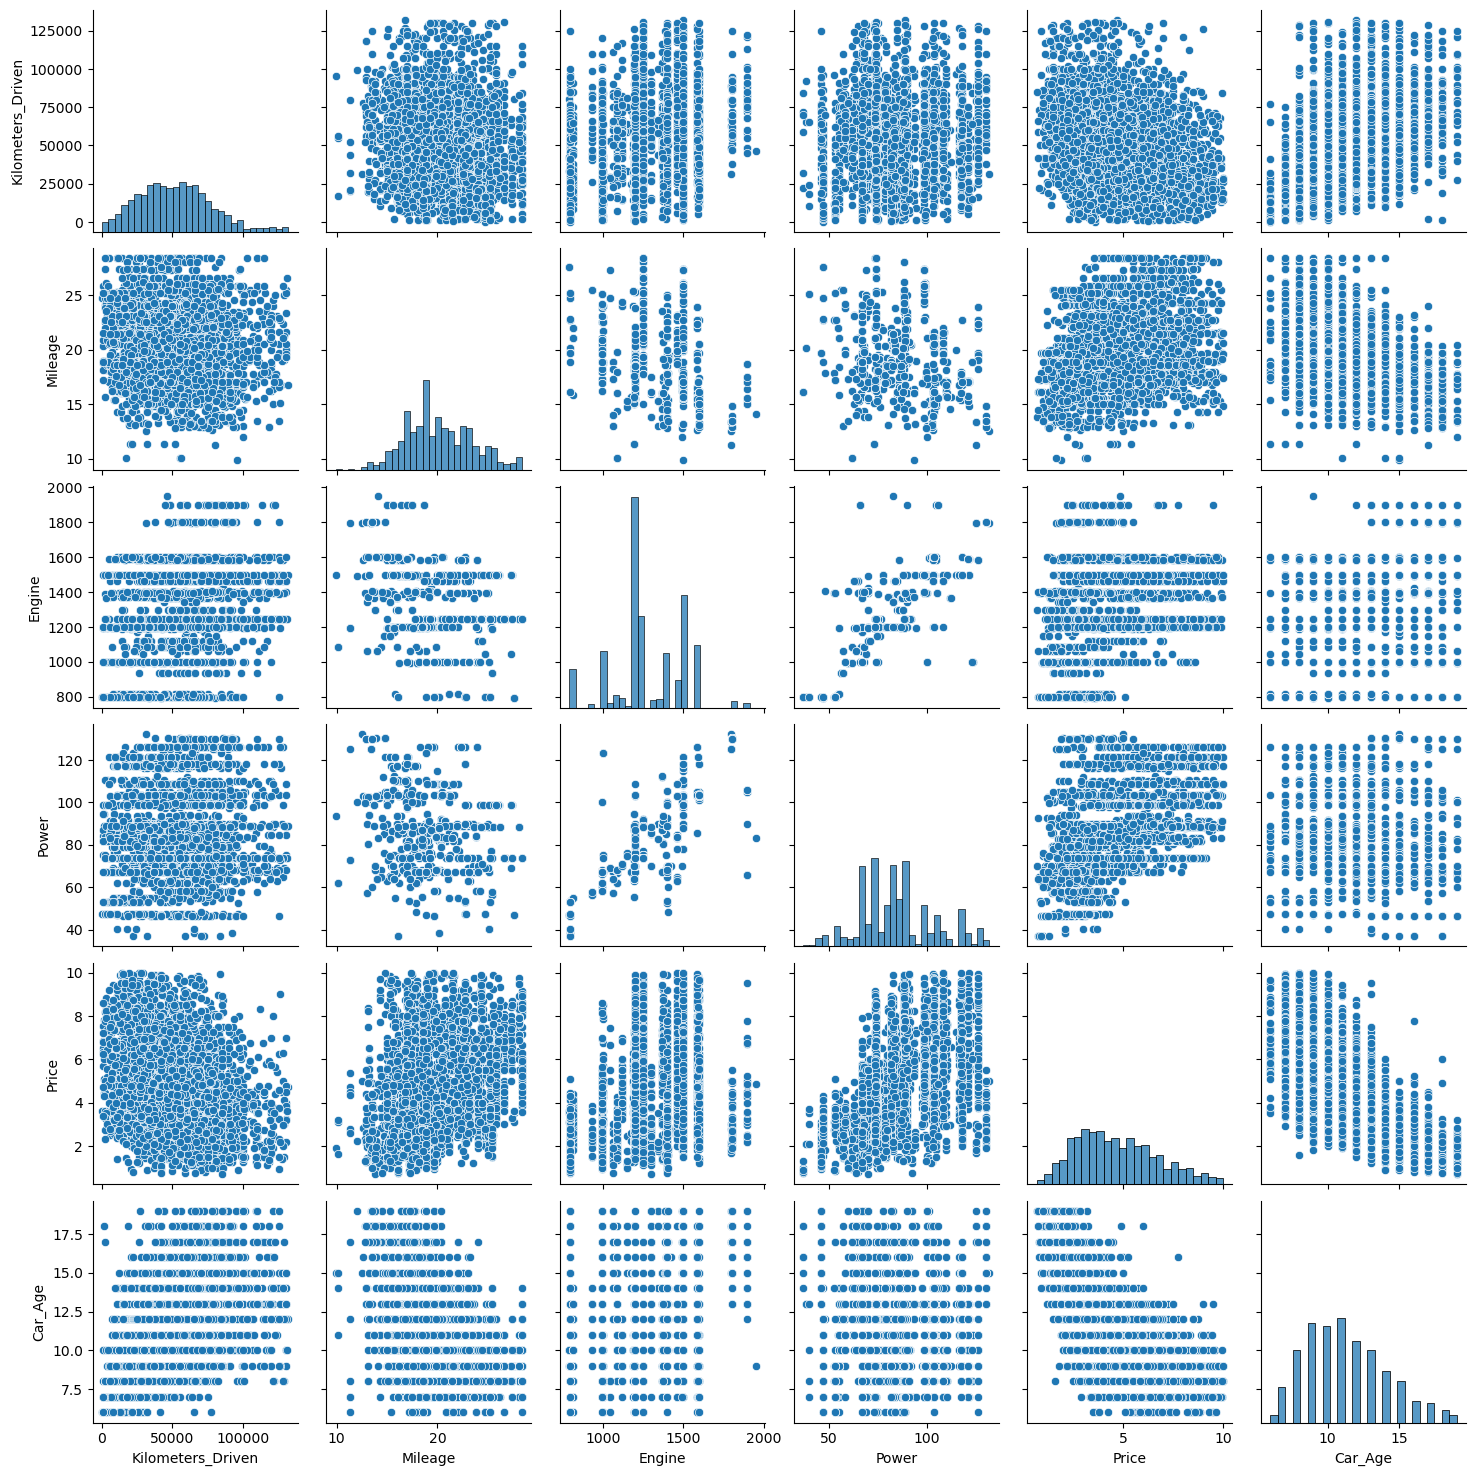

In [54]:
plt.figure(figsize=(12,8))
sns.pairplot(data=budget_df)
plt.show()

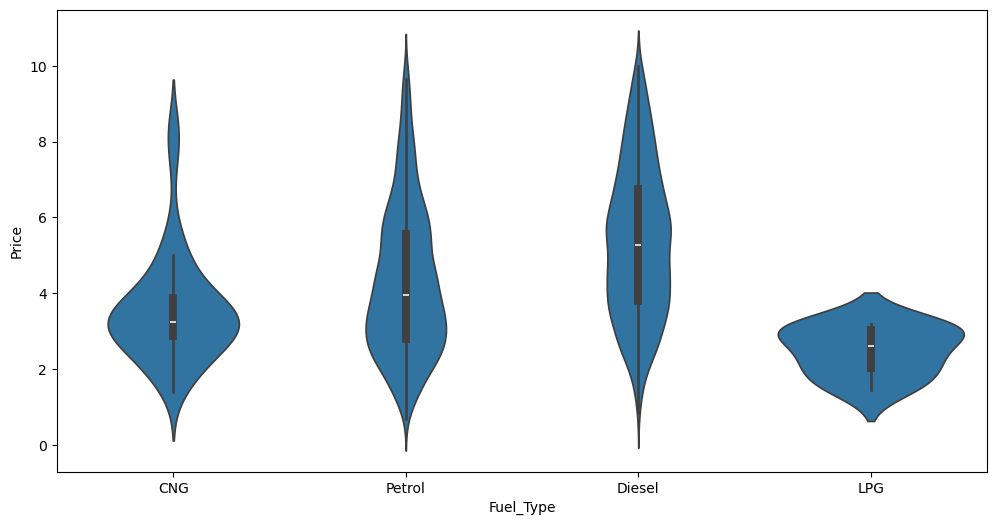

In [55]:
plt.figure(figsize=(12,6))
sns.violinplot(data=budget_df, y="Price", x="Fuel_Type")
plt.show()

## **Multivariate Analysis for Budget Cars:**

In [57]:
numeric_col = budget_df.select_dtypes(include=["number"])
numeric_col

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
0,72000,19.950,998,58.16,1.75,15
2,46000,18.200,1199,88.70,4.50,14
3,87000,20.770,1248,88.76,6.00,13
5,75000,15.825,814,55.20,2.35,13
6,86999,23.080,1461,63.10,3.50,12
...,...,...,...,...,...,...
5838,70602,25.800,1498,98.60,4.83,10
5839,27365,28.400,1248,74.00,4.75,11
5840,100000,24.400,1120,71.00,4.00,10
5842,46000,18.900,998,67.10,2.65,12


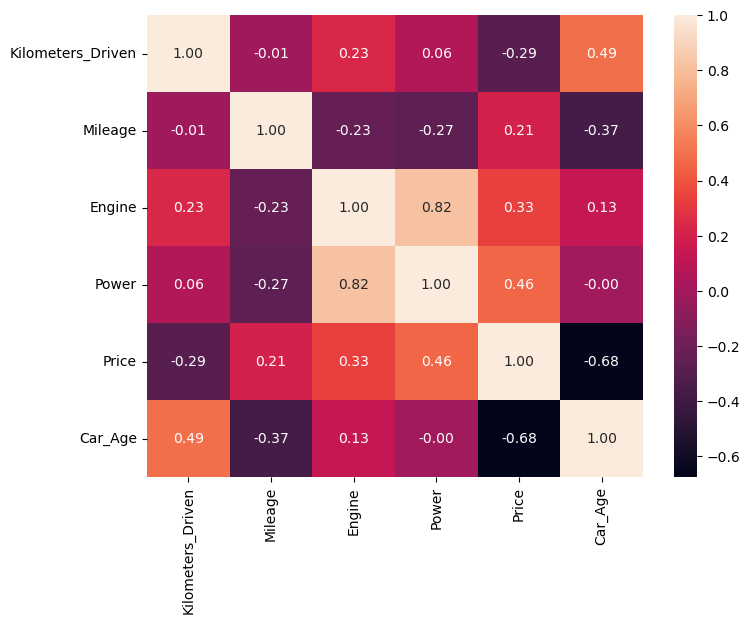

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_col.corr(), annot= True, fmt=".2f")
plt.show()

The correlation matrix reveals a perfect **negative correlation between Car_Age and Price**, indicating a strong inverse relationship — **as a vehicle gets older, its market value consistently decreases.**

# **Luxury Car Analysis**

In [61]:
luxury_df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
count,1.466000e+03,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,5.655541e+04,15.369543,2298.474761,179.187374,23.723486,10.396317
std,1.716567e+05,3.384911,589.947874,56.680258,14.715429,2.555692
min,1.000000e+03,6.400000,1248.000000,87.200000,10.000000,6.000000
25%,2.982325e+04,12.800000,1968.000000,140.800000,13.257500,8.000000
50%,4.700000e+04,15.000000,2143.000000,174.330000,19.000000,10.000000
75%,6.745775e+04,17.680000,2755.000000,190.000000,29.475000,12.000000
max,6.500000e+06,27.030000,5998.000000,560.000000,160.000000,20.000000


In [62]:
luxury_df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car_Age
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17.50,Toyota,9
13,Delhi,72000,Diesel,Automatic,First,12.70,2179,187.70,5,27.00,Land Rover,11
14,Delhi,110000,Diesel,Manual,First,13.50,2477,175.56,7,15.00,Mitsubishi,11


In [63]:
cat_col1 = luxury_df.select_dtypes(include = ["object"]).columns.tolist()
cat_col1

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']

In [64]:
numeric_col1 = luxury_df.select_dtypes(include= ["number"]).columns.tolist()
numeric_col1

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age']

Location


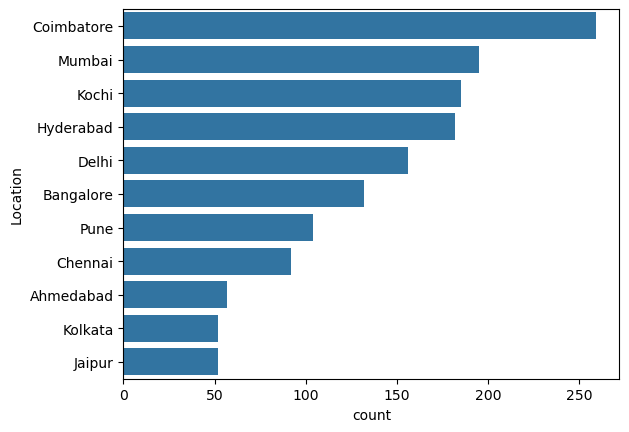

Fuel_Type


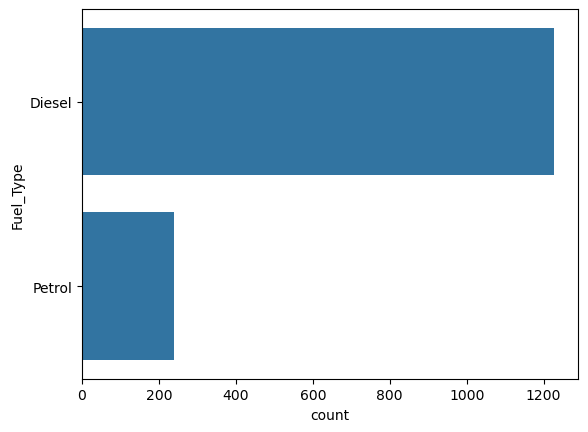

Transmission


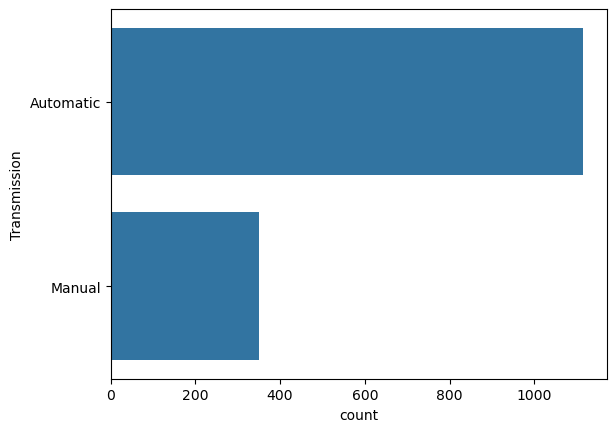

Owner_Type


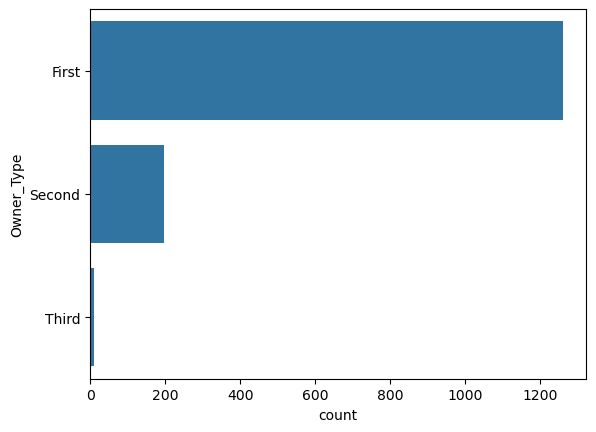

Seats


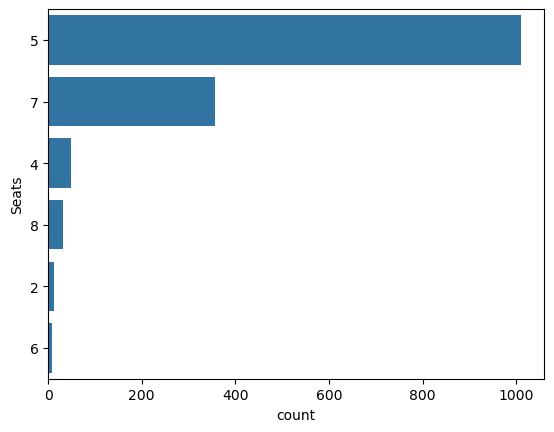

Brand


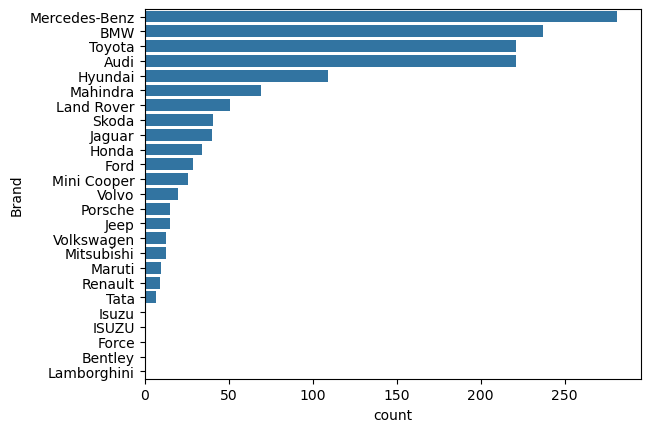

In [65]:
for col in cat_col:
    print(col)
    sns.countplot(luxury_df[col], order=luxury_df[col].value_counts().index)
    plt.show()

## **Univariate Analysis for Luxury Cars:**

- Coimbatore holds the largest luxury used car market, followed by Mumbai and Kochi, while Jaipur records the lowest activity in this segment.
- Diesel-powered luxury cars dominate the market, with petrol variants appearing far less frequently.
- The majority of luxury used cars come with automatic transmissions, aligning with premium vehicle standards.
- Most luxury cars in the pre-owned market are first-owner vehicles, reflecting careful ownership history.
- Among budget-friendly luxury options, 5-seaters are the most common, followed by 7-seaters.
- Mercedes-Benz leads the luxury used car market, with BMW and Toyota trailing closely behind.

<Figure size 1200x800 with 0 Axes>

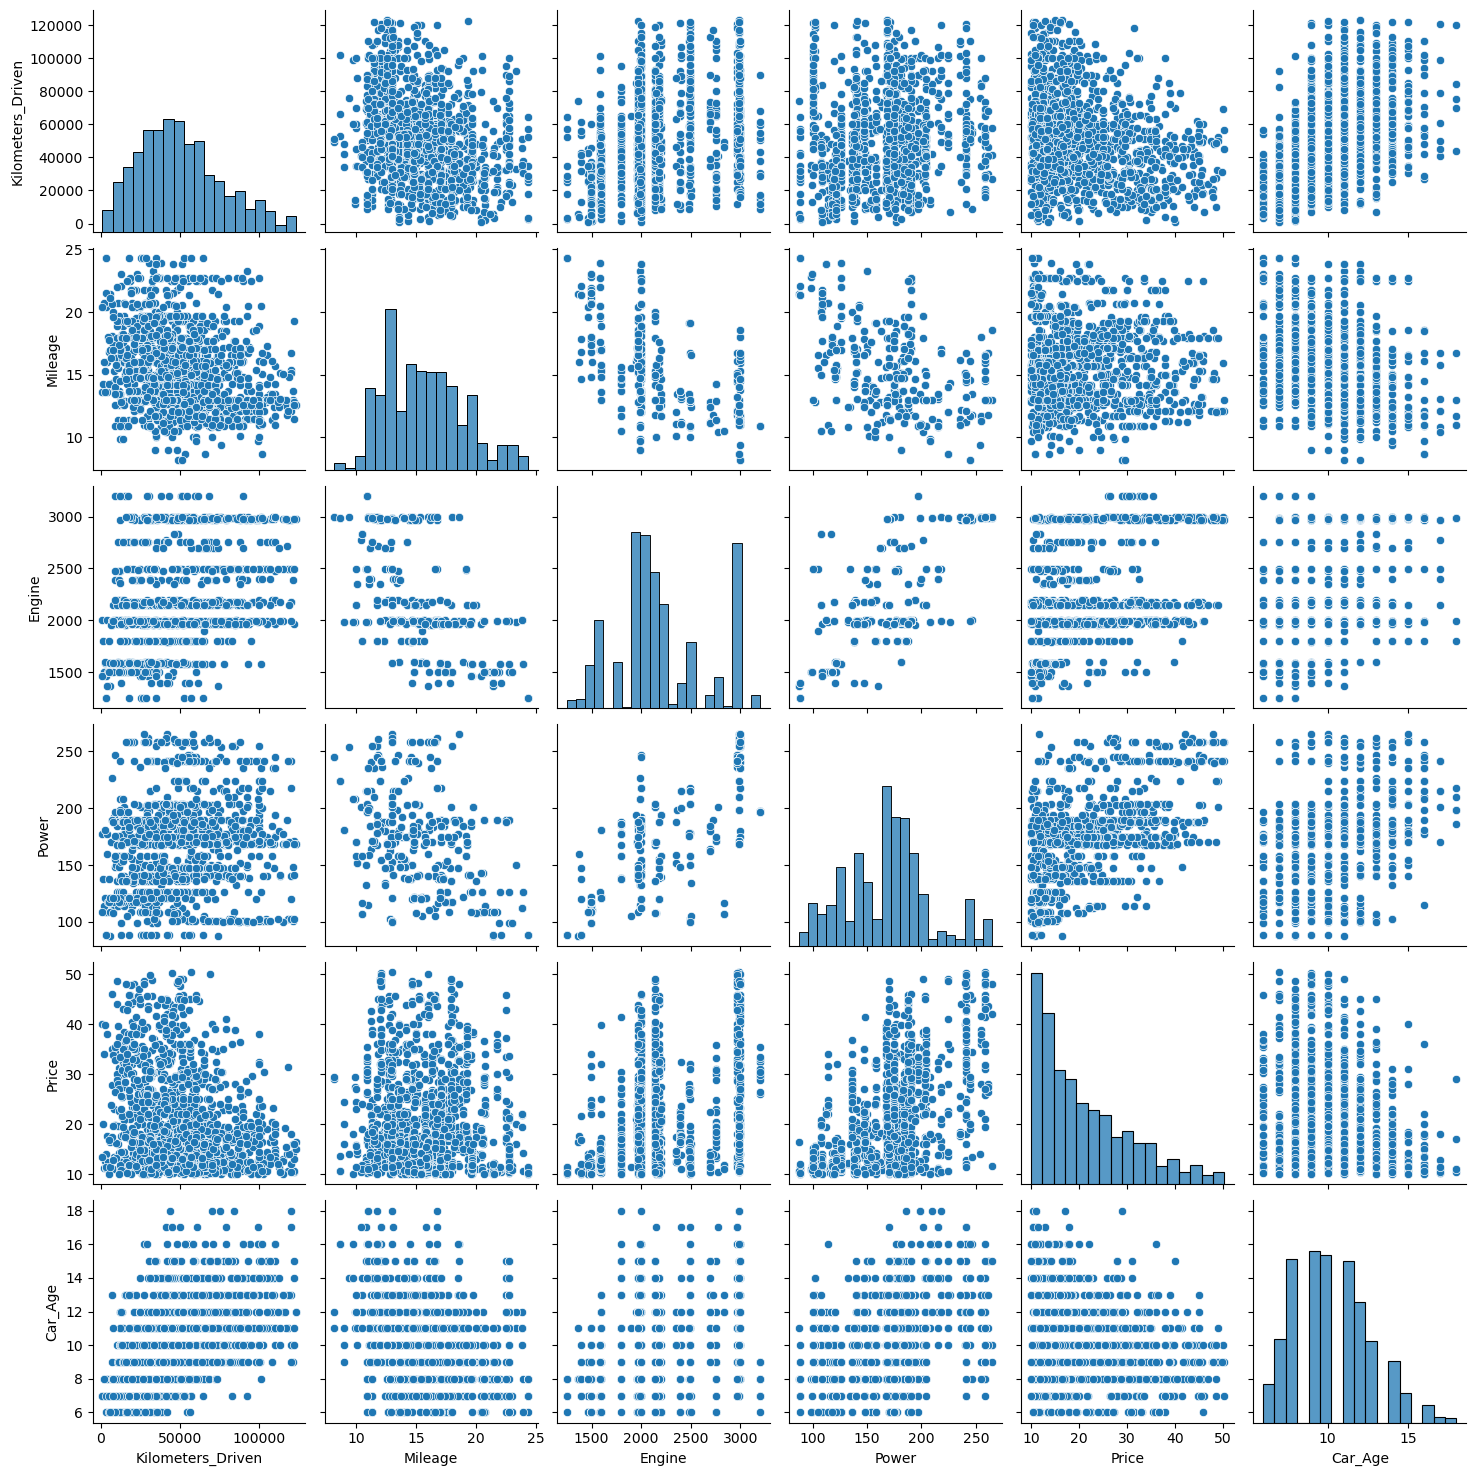

In [141]:
plt.figure(figsize=(12,8))
sns.pairplot(data = luxury_df)
plt.show() 

In [145]:
numeric_col1 = luxury_df.select_dtypes(include=["number"])
numeric_col1

,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
1,41000,19.67,1582,126.20,12.50,10
4,40670,15.20,1968,140.80,17.74,12
7,36000,11.36,2755,171.50,17.50,9
13,72000,12.70,2179,187.70,27.00,11
14,110000,13.50,2477,175.56,15.00,11
...,...,...,...,...,...,...
5815,58629,18.25,1968,187.74,16.52,12
5822,31150,16.36,2179,187.70,30.54,9
5827,91903,17.68,1968,174.33,17.56,12
5832,102002,8.70,2987,224.34,10.75,16


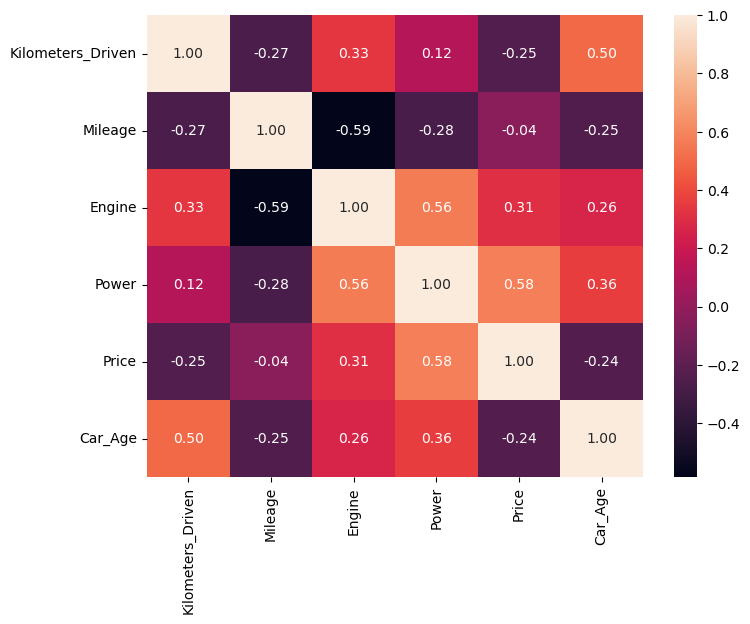

In [147]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_col1.corr(), annot= True, fmt=".2f")
plt.show()

The correlation matrix also **indicates a negative relationship between engine size and mileage**, implying that **vehicles with larger engines generally offer lower fuel efficiency**.